<a href="https://colab.research.google.com/github/Andicleomj/Machine-Learning/blob/main/Week2/Kaggle/FinancialMarket.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import libraries yang diperlukan
import pandas as pd                             # Untuk mengelola dataset
import numpy as np                              # Untuk operasi numerik
from sklearn.model_selection import train_test_split  # Untuk membagi data menjadi train dan test set
from sklearn.preprocessing import PolynomialFeatures  # Untuk membuat fitur basis polinomial
from sklearn.linear_model import LinearRegression     # Untuk model regresi linear
from sklearn.metrics import mean_squared_error, r2_score  # Untuk evaluasi kinerja model
import matplotlib.pyplot as plt                 # Untuk visualisasi

* pandas (pd): Library yang digunakan untuk membaca, mengelola, dan memanipulasi data dalam bentuk tabel.
* numpy (np): Library untuk operasi numerik, seperti operasi pada array dan fungsi matematika.
* train_test_split: Fungsi dari sklearn yang digunakan untuk membagi dataset menjadi data latih (train set) dan data uji (test set).
* PolynomialFeatures: Digunakan untuk membuat fitur-fitur tambahan berbasis polinomial dari fitur-fitur awal. Ini diperlukan untuk regresi dengan basis fungsi polinomial.
* LinearRegression: Model regresi linear dari sklearn untuk memprediksi hubungan linier antara fitur dan target.
* mean_squared_error, r2_score: Metrik evaluasi yang digunakan untuk mengevaluasi performa model regresi.
* matplotlib.pyplot (plt): Digunakan untuk membuat visualisasi data dan hasil model.

In [ ]:
# Load dataset
# Pastikan file FinancialMarket.csv ada di direktori yang sama atau masukkan path yang sesuai.
data = pd.read_csv("/content/sample_data/FinancialMarket.csv")

* Kode ini digunakan untuk membaca file CSV yang berisi data FinancialMarket.csv dan menyimpannya dalam variabel data sebagai DataFrame.

In [ ]:
#Menampilkan beberapa baris pertama dataset untuk memahami strukturnya
print("Data Awal: \n", data.head())

Data Awal: 
          x  combined_data
0  0.00000       0.003073
1  0.01001       0.033492
2  0.02002      -0.027269
3  0.03003       0.176319
4  0.04004      -0.006027


* data.head(): Menampilkan 5 baris pertama dari dataset data untuk memberikan gambaran awal tentang struktur dan isi dataset.

In [ ]:
# Memeriksa missing values dalam dataset
print("\nMissing Values:\n", data.isnull().sum())


Missing Values:
 x                0
combined_data    0
dtype: int64


* data.isnull().sum(): Memeriksa apakah terdapat nilai yang hilang (missing values) di setiap kolom.

In [ ]:
# Mengisi missing values jika ada (contoh: dengan mean, median, atau metode lainnya)
data.fillna(data.mean(), inplace=True)

* data.fillna(data.mean(), inplace=True): Mengisi nilai yang hilang pada dataset dengan nilai rata-rata (mean) dari setiap kolom.
* data.mean() akan menghitung rata-rata dari setiap kolom dan fillna() akan mengganti missing values (jika ada) dengan rata-rata tersebut.
* inplace=True berarti penggantian dilakukan langsung pada DataFrame data tanpa membuat salinan.
* Ini adalah salah satu cara untuk menangani missing values, tetapi metode lain seperti menggunakan median atau metode imputation juga dapat dipertimbangkan tergantung karakteristik data.

In [ ]:
# Memisahkan fitur dan target
# Asumsikan bahwa kolom terakhir adalah target, dan yang lain sebagai fitur
X = data.iloc[:, :-1].values  # Semua kolom kecuali yang terakhir sebagai fitur
y = data.iloc[:, -1].values   # Kolom terakhir sebagai target


* X: Menyimpan fitur-fitur (input) dari dataset. data.iloc[:, :-1].values berarti mengambil semua kolom kecuali kolom terakhir.
* y: Menyimpan target (output) dari dataset. data.iloc[:, -1].values berarti mengambil kolom terakhir dari dataset.
* iloc: Digunakan untuk indexing berdasarkan posisi. : artinya semua baris, :-1 artinya semua kolom kecuali kolom terakhir.
* values: Digunakan untuk mengubah DataFrame menjadi array numpy, yang merupakan format standar untuk digunakan di sklearn.

In [ ]:
# Membagi dataset menjadi train dan test set (rasio 70:30)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


* X: Fitur-fitur pada dataset (independent variables).
* y: Target (kolom yang ingin diprediksi, dependent variable).
test_size=0.3: Menentukan proporsi data uji menjadi 30% dari total dataset, sedangkan sisanya 70% untuk data latih.
* random_state=42: Seed yang digunakan untuk pembagian data secara acak agar hasilnya bisa direplikasi. Ini memastikan bahwa setiap kali kode dijalankan, data akan terbagi dengan cara yang sama.

In [ ]:
# 1. Regresi Linear Sederhana
# Membangun model regresi linear sederhana
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)  # Melatih model menggunakan data latih

LinearRegression()

* linear_model = LinearRegression(): Membuat objek dari model regresi linear (LinearRegression).
* linear_model.fit(X_train, y_train): Melatih model dengan data latih, di mana X_train adalah fitur latih dan y_train adalah target latih.
* Tujuannya adalah agar model mempelajari hubungan linier antara fitur dan target, sehingga dapat memprediksi nilai target berdasarkan input fitur.

In [ ]:
# Prediksi pada data uji
y_pred_simple = linear_model.predict(X_test)

* y_pred_simple: Menyimpan hasil prediksi dari model regresi linear sederhana pada data uji X_test.
* linear_model.predict(X_test): Menggunakan model yang telah dilatih (linear_model) untuk memprediksi nilai target (y_test) berdasarkan fitur-fitur pada data uji (X_test).

In [ ]:
# Menghitung metrik evaluasi untuk Regresi Linear Sederhana
mse_simple = mean_squared_error(y_test, y_pred_simple)        # Mean Squared Error
rmse_simple = np.sqrt(mse_simple)                            # Root Mean Squared Error
r2_simple = r2_score(y_test, y_pred_simple)                  # R-Squared

* mean_squared_error(y_test, y_pred_simple): Menghitung rata-rata kuadrat dari selisih antara nilai aktual (y_test) dan nilai prediksi (y_pred_simple).
* RMSE (Root Mean Squared Error):
np.sqrt(mse_simple): Menghitung akar kuadrat dari MSE.
* R-Squared (R²):
r2_score(y_test, y_pred_simple): Menghitung koefisien determinasi (R²) yang mengukur proporsi variabilitas dalam target yang dapat dijelaskan oleh fitur-fitur dalam model.

In [ ]:
print("\n===== Regresi Linear Sederhana =====")
print("MSE (Mean Squared Error):", mse_simple)
print("RMSE (Root Mean Squared Error):", rmse_simple)
print("R-Squared:", r2_simple)


===== Regresi Linear Sederhana =====
MSE (Mean Squared Error): 10.300511061950568
RMSE (Root Mean Squared Error): 3.209440926695889
R-Squared: 0.65712474949117


* Menampilkan nilai MSE, RMSE, dan R² dari model regresi linear sederhana untuk mengevaluasi kinerja model.
* Ini memberikan informasi tentang seberapa baik model dapat memprediksi nilai target pada data uji.

In [ ]:
# 2. Regresi Linear dengan Basis Fungsi
# Menentukan derajat polinomial (contoh: degree=2 untuk basis polinomial kuadrat)
degree = 2
polynomial_features = PolynomialFeatures(degree=degree)   # Membuat objek PolynomialFeatures
X_train_poly = polynomial_features.fit_transform(X_train) # Transformasi fitur latih
X_test_poly = polynomial_features.transform(X_test)       # Transformasi fitur uji


* Membuat fitur tambahan berdasarkan derajat polinomial (contoh: degree=2 untuk membuat fitur kuadrat dan interaksi antara fitur-fitur asli).
* polynomial_features.fit_transform(X_train): Mengubah fitur-fitur pada X_train menjadi fitur-fitur baru berbasis polinomial.
* polynomial_features.transform(X_test): Mengubah fitur-fitur pada X_test menjadi fitur-fitur baru yang sama.

In [ ]:
# Membangun model regresi linear dengan basis fungsi
linear_model_poly = LinearRegression()
linear_model_poly.fit(X_train_poly, y_train)              # Melatih model menggunakan fitur basis polinomial

LinearRegression()

* linear_model_poly = LinearRegression(): Membuat objek dari model regresi linear untuk basis polinomial.
* linear_model_poly.fit(X_train_poly, y_train): Melatih model dengan fitur polinomial yang telah dibuat sebelumnya (X_train_poly) dan target (y_train).

In [ ]:
# Prediksi pada data uji dengan fitur basis polinomial
y_pred_poly = linear_model_poly.predict(X_test_poly)

* y_pred_poly: Menyimpan hasil prediksi dari model regresi linear dengan fitur basis polinomial pada data uji X_test_poly.
* linear_model_poly.predict(X_test_poly): Menggunakan model yang telah dilatih (linear_model_poly) untuk memprediksi nilai target berdasarkan fitur-fitur polinomial pada data uji.

In [ ]:
# Menghitung metrik evaluasi untuk Regresi Linear dengan Basis Fungsi
mse_poly = mean_squared_error(y_test, y_pred_poly)        # Mean Squared Error
rmse_poly = np.sqrt(mse_poly)                             # Root Mean Squared Error
r2_poly = r2_score(y_test, y_pred_poly)                   # R-Squared

* MSE: Rata-rata kuadrat kesalahan prediksi.
* RMSE: Akar dari MSE, menunjukkan kesalahan prediksi dalam satuan yang sama dengan target.
* R²: Koefisien determinasi, seberapa baik model menjelaskan variabilitas data.

In [ ]:
print("\n===== Regresi Linear dengan Basis Fungsi (Polinomial Degree = {}) =====".format(degree))
print("MSE (Mean Squared Error):", mse_poly)
print("RMSE (Root Mean Squared Error):", rmse_poly)
print("R-Squared:", r2_poly)


===== Regresi Linear dengan Basis Fungsi (Polinomial Degree = 2) =====
MSE (Mean Squared Error): 1.4394985643426963
RMSE (Root Mean Squared Error): 1.1997910502844635
R-Squared: 0.9520831123924216


* print("\n===== Regresi Linear dengan Basis Fungsi (Polinomial Degree = {}) =====".format(degree)): Menampilkan judul yang menunjukkan bahwa informasi berikutnya adalah tentang regresi linear dengan basis fungsi polinomial dengan derajat yang telah ditentukan (degree).
* print("MSE (Mean Squared Error):", mse_poly): Menampilkan nilai Mean Squared Error (MSE) dari model regresi linear dengan basis fungsi polinomial. MSE memberikan gambaran tentang rata-rata kesalahan kuadrat dalam prediksi model.
* print("RMSE (Root Mean Squared Error):", rmse_poly): Menampilkan nilai Root Mean Squared Error (RMSE) dari model. RMSE memberikan ukuran kesalahan dalam satuan yang sama dengan target, sehingga lebih mudah untuk diinterpretasikan.
* print("R-Squared:", r2_poly): Menampilkan nilai R² (R-Squared) dari model, yang menunjukkan seberapa baik model dapat menjelaskan variasi dalam data. Nilai R² berkisar dari 0 hingga 1, di mana nilai yang lebih tinggi menunjukkan model yang lebih baik.

In [ ]:
# Visualisasi Perbandingan
# Membuat plot untuk membandingkan prediksi vs nilai aktual pada kedua model
plt.figure(figsize=(14, 6))

<Figure size 1400x600 with 0 Axes>

<Figure size 1400x600 with 0 Axes>

* plt.figure(figsize=(14, 6)): Mengatur ukuran figure (gambar) yang akan ditampilkan. Dalam hal ini, lebar figure adalah 14 inci dan tinggi adalah 6 inci. Ini memberikan ruang yang cukup untuk menampilkan dua subplot (grafik) secara berdampingan dengan jelas.

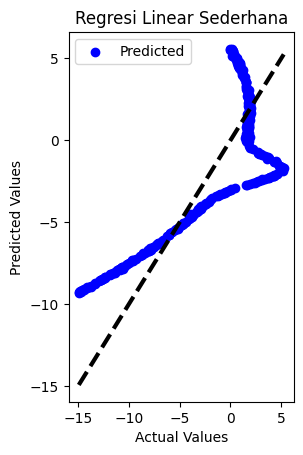

In [ ]:
# Plot Regresi Linear Sederhana
plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred_simple, color='blue', label='Predicted')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=3)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Regresi Linear Sederhana')
plt.legend()

* plt.subplot(1, 2, 1): Menentukan bahwa ini adalah subplot pertama dari dua subplot yang akan ditampilkan dalam satu baris dan dua kolom.
* plt.scatter(y_test, y_pred_simple, color='blue', label='Predicted'): Membuat scatter plot untuk menampilkan nilai aktual (y_test) di sumbu x dan nilai prediksi dari model regresi linear sederhana (y_pred_simple) di sumbu y. Titik-titik akan berwarna biru, dan label 'Predicted' akan digunakan dalam legenda.
* plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=3): Menggambar garis diagonal putus-putus yang menunjukkan garis kesempurnaan, di mana nilai aktual sama dengan nilai prediksi. Jika model sempurna, semua titik prediksi akan berada di sepanjang garis ini. Garis ini membantu untuk melihat seberapa dekat prediksi dengan nilai aktual.
* plt.xlabel('Actual Values'): Menambahkan label untuk sumbu x, yang menunjukkan bahwa sumbu ini merepresentasikan nilai aktual dari target.
* plt.ylabel('Predicted Values'): Menambahkan label untuk sumbu y, yang menunjukkan bahwa sumbu ini merepresentasikan nilai prediksi dari model.
* plt.title('Regresi Linear Sederhana'): Menambahkan judul untuk plot ini, yang menjelaskan bahwa ini adalah visualisasi untuk regresi linear sederhana.
* plt.legend(): Menampilkan legenda pada plot, sehingga memudahkan pemahaman tentang apa yang diwakili oleh warna dan label pada plot.

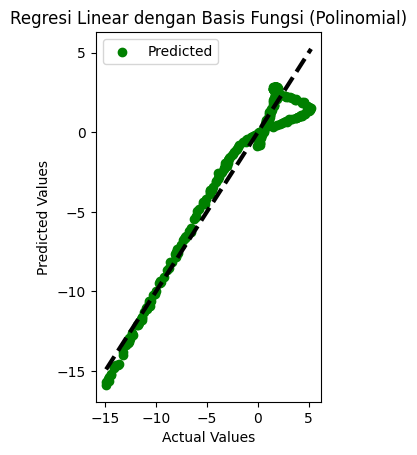

In [ ]:
# Plot Regresi Linear dengan Basis Fungsi
plt.subplot(1, 2, 2)
plt.scatter(y_test, y_pred_poly, color='green', label='Predicted')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=3)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Regresi Linear dengan Basis Fungsi (Polinomial)')
plt.legend()

* plt.subplot(1, 2, 2): Menentukan bahwa ini adalah subplot kedua dari dua subplot yang akan ditampilkan dalam satu baris dan dua kolom.
* plt.scatter(y_test, y_pred_poly, color='green', label='Predicted'): Membuat scatter plot untuk menampilkan nilai aktual (y_test) di sumbu x dan nilai prediksi dari model regresi linear dengan basis fungsi polinomial (y_pred_poly) di sumbu y. Titik-titik akan berwarna hijau, dan label 'Predicted' akan digunakan dalam legenda.
* plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=3): Menggambar garis diagonal putus-putus yang sama seperti sebelumnya, menunjukkan garis kesempurnaan.
* plt.xlabel('Actual Values'): Menambahkan label untuk sumbu x.
* plt.ylabel('Predicted Values'): Menambahkan label untuk sumbu y.
* plt.title('Regresi Linear dengan Basis Fungsi (Polinomial)'): Menambahkan judul untuk plot ini, yang menjelaskan bahwa ini adalah visualisasi untuk regresi linear dengan basis fungsi polinomial.
* plt.legend(): Menampilkan legenda pada plot.

In [ ]:
# Menampilkan plot
plt.suptitle('Perbandingan Hasil Prediksi')
plt.show()

<Figure size 640x480 with 0 Axes>

* plt.suptitle('Perbandingan Hasil Prediksi'): Menambahkan judul umum untuk seluruh figure (dua subplot), menjelaskan bahwa ini adalah perbandingan hasil prediksi dari kedua model.
* plt.show(): Menampilkan semua plot yang telah dibuat. Ini adalah langkah terakhir untuk melihat hasil visualisasi, di mana pengguna dapat membandingkan hasil prediksi dari model regresi linear sederhana dan model regresi linear dengan basis fungsi polinomial secara visual.